# Assignment 2: Exploratory Data Analysis and Visualization

#### Gina Choi 84259324

**Summary of Dataset**

From kaggle, the World University Rankings 2023 dataset spans 104 countries and regions with 1799 universities. The data was collected by Times Higher Education's survey responses from 40,000 scholars across the world and analyzing 121 million citations in over 15.5 million research publications. Over 2,500 institutions
submitted data and over 680,000 data points were collected as a result. The key variables in this dataset are the teaching, research, international outlook and citations score. 

**Characterization of Data:**

- 2341 observations
- 13 variables

**Link to Data:** https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023

| Variable Name             | Description                               | Data Type |
|-------------------------|-------------------------------------------|-----------|
| University Rank         | World ranking of the university                 | character   |
| Name of University      | Name                     | character |
| Location                | University Location               | character |
| No of student           | Number of students enrolled presently                     | numeric  |
| No of student per staff | Number of students per staff (students under 1 professor)          | numeric   |
| International Student   | Percentage of international students      | character  |
| Female : Male Ratio     | Ratio of female to male students          | character   |
| OverAll Score           | Overall score out of 100          | character    |
| Teaching Score          | Teaching score out of 100         | character    |
| Research Score          | Research score out of 100         | character    |
| Citations Score         | Citations score out of 100. (Number of citations recieved by a journal in a year to documents published in the past 3 years divided by number of indexed documents in Scopus published in the past 3 years)     | character    |
| Industry Income Score   | Industry income score out of 100. Based on how much the university earns from the working industry due to its academics.  | character    |
| International Outlook Score | International outlook score out of 100. Based on how well the university attracts students and staff on a global scale. | character  |

**Question:** 

### **How does the research score change based on university rank, teaching score, and female to male ratios?**

This question is inferential - I am looking to explore the relationship between these covariates and the research score. My goal is to quantify these trends using the following variables in the dataset: Female : Male Ratio, University Rank, Research Score, and Teaching Score. This would provide insight into how the quality of teaching, gender ratios, and ranking affects the quality of research at an institution. We will explore and quantify how applicable these insights can be to the wider population.  

Gender wage gaps vary across the globe. For example, according to the annual Gender Gap Report in 2023 by the World Economic Forum, India placed 127th out of 146 countries. In comparison, Canada ranked 52nd. Therefore, it will be interesting to see if the institutions' research score reflects this gap. 

Furthermore, we can see how rank affects these gender ratios. In general and in most countries, higher ranking universities more likely lead to better opportunities and salaries, which could be a factor in the gender gap if higher ranking institutions had fewer females enrolled. As a higher research score increases rank, this could suggest that high research scores may associate with lower female enrollment. 

Finally, teaching score reflects the expertise of faculty, which may be associated with the research score. However, we will keep in mind that some institutions are better known for research than teaching and vice versa.


In [2]:
install.packages("readr")
install.packages("ggplot2")
library(readr)
library(dplyr)
library(ggplot2)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message in install.packages("readr"):
“installation of package ‘readr’ had non-zero exit status”
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



### First, we read the dataset from the web into R

In [190]:
data <- read_csv("/home/jupyter/301 Project/data.csv")
head(data)

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


## Cleaning and Wrangling data into a Tidy format:

By looking at the last rows of the data, we see many NA and n/a values. To clean the data up, we use na.omit() to remove these values.

In [191]:
tail(data)
data[data == "n/a"]  <- NA
tidy_data <- na.omit(data)

University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
-,University of the Western Cape,NA,NA,NA,NA,NA,34.0–39.2,20.4,23.7,61.6,36.9,55.8
-,University of the West of Scotland,NA,NA,NA,NA,NA,34.0–39.2,24.1,15.5,61.5,37.9,76.8
-,University of Windsor,NA,NA,NA,NA,NA,34.0–39.2,35.1,29.4,34.5,44.2,88.7
-,University of Wolverhampton,NA,NA,NA,NA,NA,34.0–39.2,18.2,14.3,68.8,37.3,72.0
-,University of Wuppertal,NA,NA,NA,NA,NA,34.0–39.2,26.4,26.7,52.8,52.1,47.6
-,Xi’an Jiaotong-Liverpool University,NA,NA,NA,NA,NA,34.0–39.2,17.8,14.8,68.2,38.2,72.4


Now when we view the last rows of our data, all NA observations have been removed:

In [192]:
tail(tidy_data)

University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1501+,West University of Timişoara,Romania,14527,24.6,6%,66 : 34,10.4–18.3,18.7,13.4,16.8,37.7,28.7
1501+,Wrocław University of Science and Technology,Poland,23657,20.3,6%,35 : 65,10.4–18.3,17.9,16.0,14.9,45.5,27.3
1501+,Yamaguchi University,Japan,10724,11.1,7%,38 : 62,10.4–18.3,21.3,12.3,13.9,43.8,30.4
1501+,Yanshan University,China,38649,13.2,1%,39 : 61,10.4–18.3,17.2,10.9,18.3,46.9,17.0
1501+,Yeditepe University,Turkey,17038,28.2,5%,55 : 45,10.4–18.3,18.8,12.2,10.5,65.7,29.6
1501+,Zonguldak Bülent Ecevit University,Turkey,28319,25.4,8%,47 : 53,10.4–18.3,13.2,8.2,23.5,38.9,23.1


To simplify data handling for future visualizations etc., we will replace the spaces in the variable names with periods. We use make.names() to do this. 

In [193]:
names(tidy_data) <- make.names(names(tidy_data))

head(tidy_data)

University.Rank,Name.of.University,Location,No.of.student,No.of.student.per.staff,International.Student,Female.Male.Ratio,OverAll.Score,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


We use duplicated() to check if there's any duplicate observations. With a FALSE output, we know each observation is unique. 

In [194]:
duplicated_rows <- duplicated(tidy_data)
summary(duplicated_rows)

   Mode   FALSE 
logical    1488 

In order to simplify the process of handling and visualizing data, we will convert the Female to Male Ratio to a single numerical value. Here, we will divide the female count by the total count. Ex. For a 48 : 52 Female to Male Ratio, the result would be 48/(48 + 52) = 0.48 

In [195]:
tidy_data$Female.Male.Ratio <- sapply(strsplit(tidy_data$Female.Male.Ratio, ":"), function(x) as.numeric(x[1])/(as.numeric(x[2]) + as.numeric(x[1])))

head(tidy_data)

University.Rank,Name.of.University,Location,No.of.student,No.of.student.per.staff,International.Student,Female.Male.Ratio,OverAll.Score,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42%,0.48,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25%,0.50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39%,0.47,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24%,0.46,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33%,0.40,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34%,0.37,94.1,90.9,97.0,97.3,89.8,83.6


In [196]:
tidy_data <- tidy_data |> select(University.Rank, Female.Male.Ratio,International.Outlook.Score,No.of.student.per.staff,Teaching.Score,Research.Score,Citations.Score)
tail(tidy_data)

University.Rank,Female.Male.Ratio,International.Outlook.Score,No.of.student.per.staff,Teaching.Score,Research.Score,Citations.Score
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1501+,0.66,28.7,24.6,18.7,13.4,16.8
1501+,0.35,27.3,20.3,17.9,16.0,14.9
1501+,0.38,30.4,11.1,21.3,12.3,13.9
1501+,0.39,17.0,13.2,17.2,10.9,18.3
1501+,0.55,29.6,28.2,18.8,12.2,10.5
1501+,0.47,23.1,25.4,13.2,8.2,23.5


Here we see that the University.Rank values in the tail of tidy_data are not exact ranks. They are all grouped in categories. Using unique(), we can get an overview of all possible values of University.Rank. Unique ranks range from 1 to 198. Ranks past 198 are grouped into one of 11 ranges.

The categories are quite large. For example, the rank 1201-1500 is very broad. Therefore, including this in our exploration would not bring more insight.

In [197]:
unique_values <- unique(tidy_data$University.Rank)
print(unique_values)

  [1] "1"         "2"         "3"         "5"         "6"         "7"        
  [7] "8"         "9"         "10"        "11"        "13"        "14"       
 [13] "15"        "18"        "20"        "21"        "22"        "23"       
 [19] "24"        "25"        "26"        "28"        "29"        "32"       
 [25] "34"        "35"        "36"        "37"        "38"        "40"       
 [31] "41"        "44"        "47"        "48"        "49"        "50"       
 [37] "51"        "52"        "54"        "57"        "59"        "60"       
 [43] "62"        "63"        "64"        "65"        "66"        "68"       
 [49] "69"        "70"        "71"        "73"        "82"        "86"       
 [55] "89"        "90"        "91"        "93"        "94"        "95"       
 [61] "98"        "99"        "101"       "104"       "106"       "107"      
 [67] "108"       "110"       "112"       "113"       "114"       "117"      
 [73] "119"       "121"       "122"       "123"       "124"     

To remove these broad ranges, we use as.numeric() to convert the University Rank entries to numeric. Ranges will become NA values. We then remove these NA values using na.omit(). 

In [198]:
tidy_data$University.Rank <- as.numeric(tidy_data$University.Rank)
tidy_data <- na.omit(tidy_data)
tail(tidy_data)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


University.Rank,Female.Male.Ratio,International.Outlook.Score,No.of.student.per.staff,Teaching.Score,Research.Score,Citations.Score
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
192,0.47,67.9,22.6,32.6,33.3,95.9
194,0.50,81.7,8.4,35.0,27.6,94.0
194,0.53,60.2,10.8,48.4,33.5,81.0
196,0.51,53.5,43.4,44.6,47.5,68.8
198,0.54,94.3,14.1,40.0,44.6,70.0
198,0.56,93.3,16.4,36.5,39.6,78.5


## Creating Visualizations:
Here, we plot University Ranking vs. the Female to Male ratio. In the plot below, there is no evidence of a relationship. Gender ratios do not appear to affect ranking.

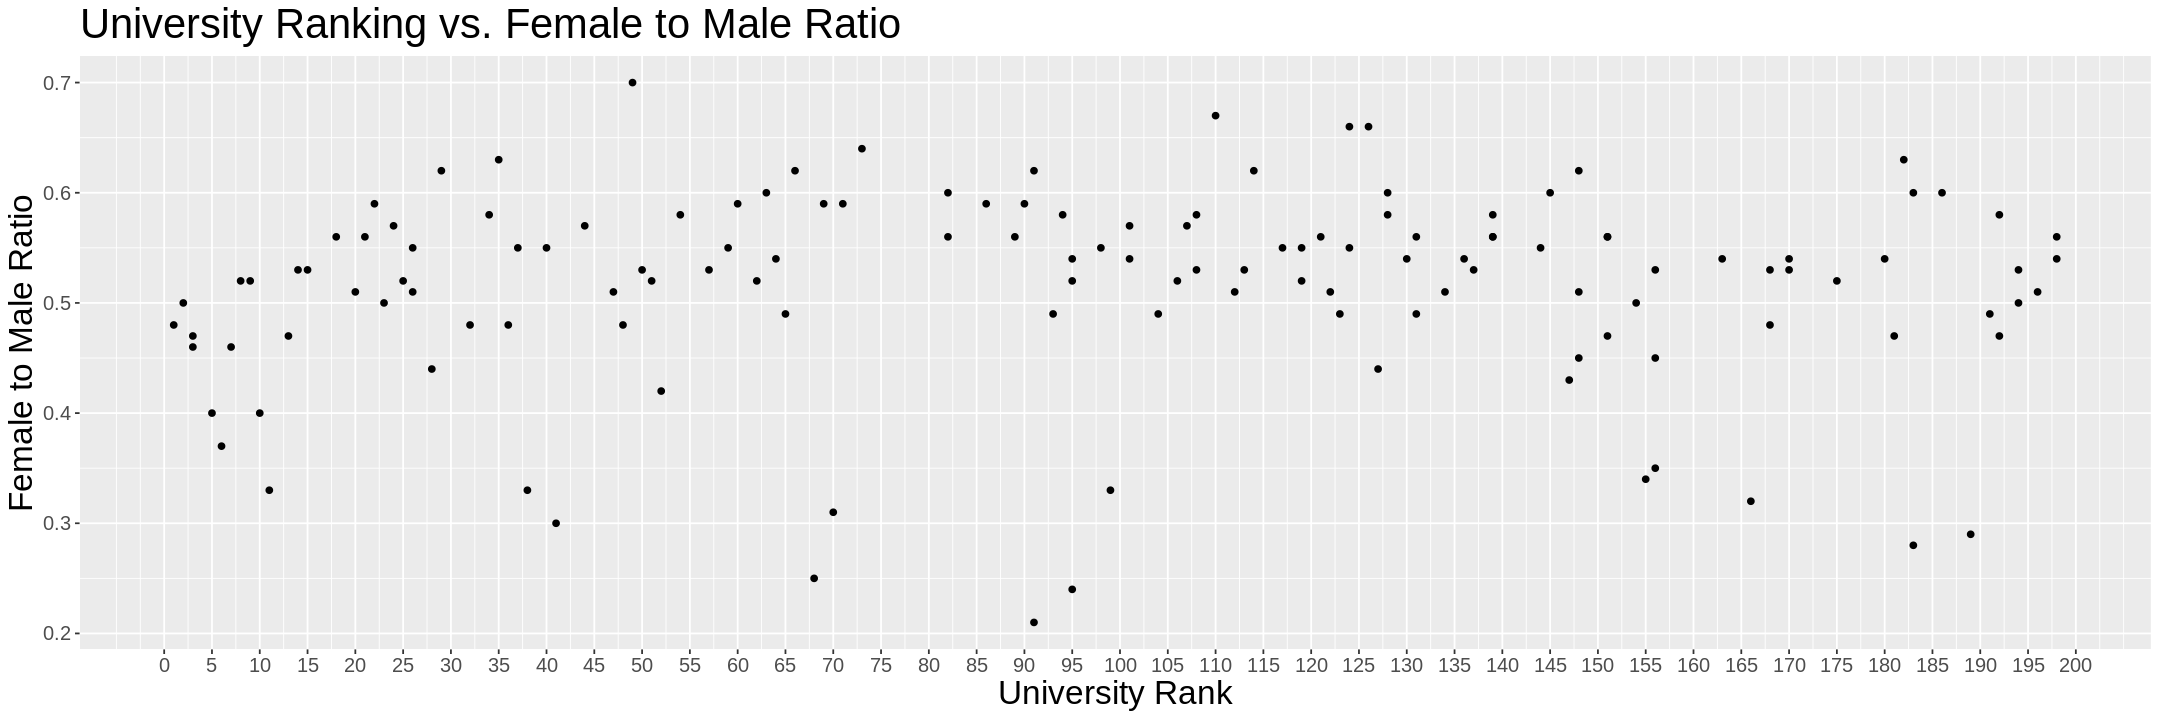

In [200]:
ggplot(tidy_data, aes(x=University.Rank, y=Female.Male.Ratio)) +
       geom_point()+ scale_x_continuous(breaks = seq(0, 200, by = 5)) + labs(x = "University Rank", y = "Female to Male Ratio", title = "University Ranking vs. Female to Male Ratio") +
       theme(axis.text = element_text(size = 12),  
             axis.title = element_text(size = 20),  
             plot.title = element_text(size = 25))  

options(repr.plot.width = 18, repr.plot.height = 6)

We then plot Research and Teaching Scores vs. University Ranking. In the visualization below, research scores have been colored blue and teaching scores are red. There is a strong pattern of both scores with ranking. This is to be expected, as ranking is based on the overall score (of which Research and Teaching scores are factors in). 

The relationships do not appear to be strictly linear, as a slight curve is visible. 

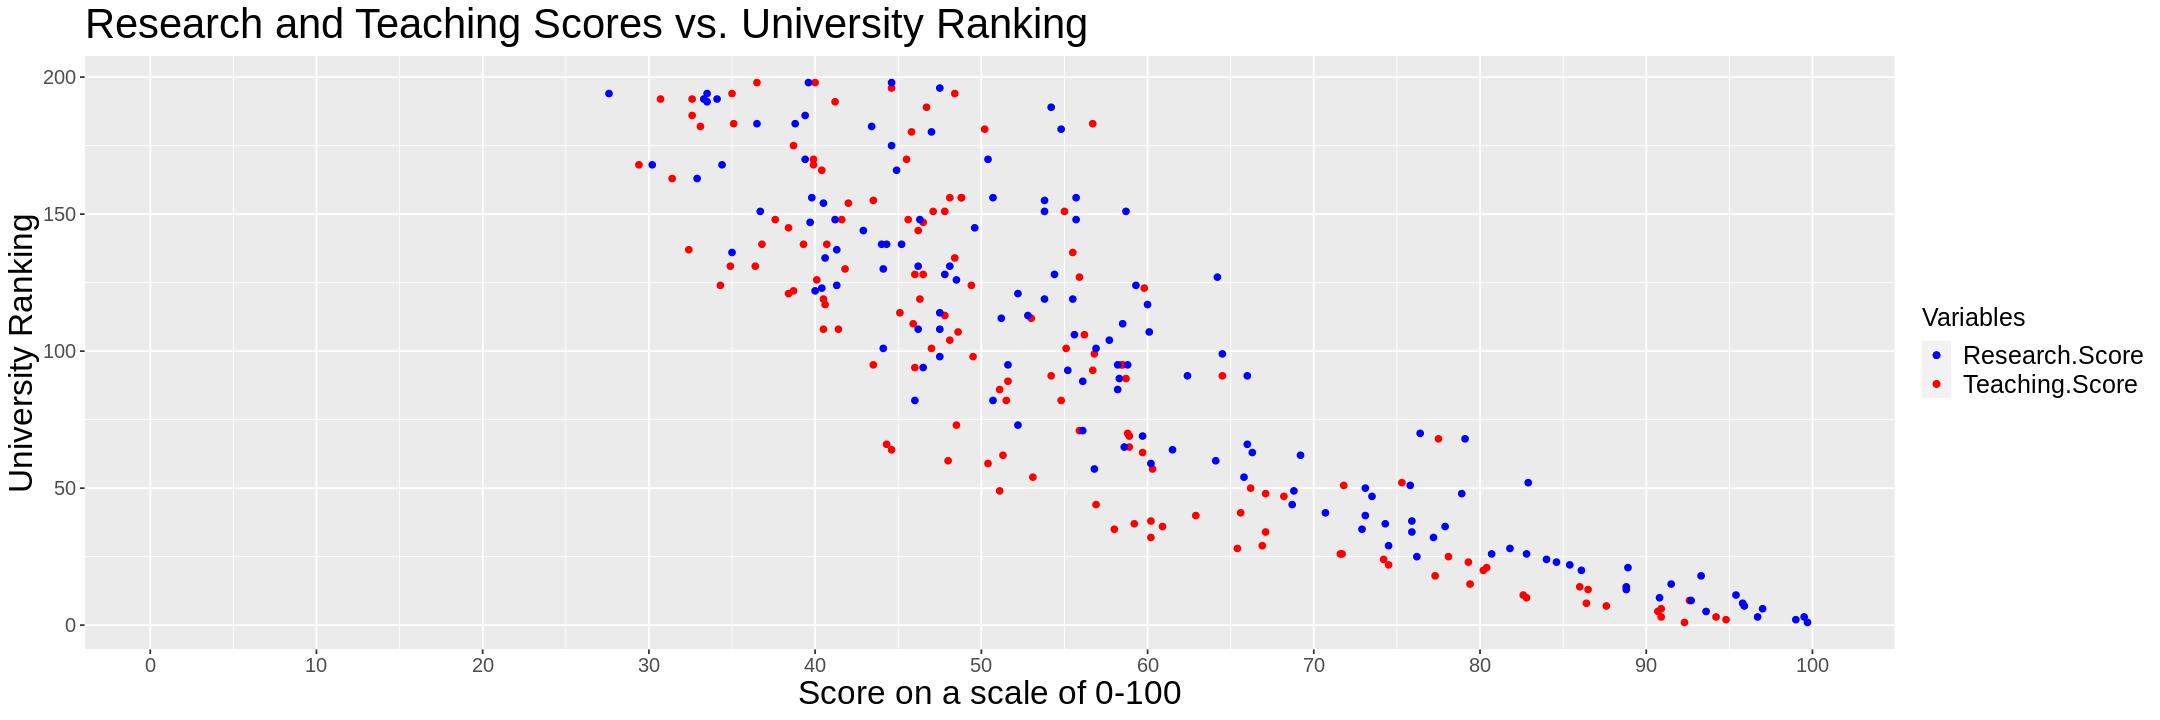

In [201]:
ggplot(tidy_data, aes(x = Teaching.Score, y = University.Rank, color = "Teaching.Score")) +
  geom_point() +
  geom_point(aes(x = Research.Score, color = "Research.Score")) +
  scale_x_continuous(limits = c(1, 100), breaks = seq(0, 100, by = 10)) +
  labs(x = "Score on a scale of 0-100", y = "University Ranking", color = "Variables", title = "Research and Teaching Scores vs. University Ranking") +
  scale_color_manual(values = c("blue", "red")) +
  theme(axis.text = element_text(size = 12),  
        axis.title = element_text(size = 20),  
        plot.title = element_text(size = 25),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 15))  

options(repr.plot.width = 18, repr.plot.height = 6)

Below, we plot the research and teaching scores vs. the female to male ratio. The plot appears scattered for both scores. Although there seems to be a higher teaching and research score for a higher female to male ratio, the magnitude of difference is not very convincing.

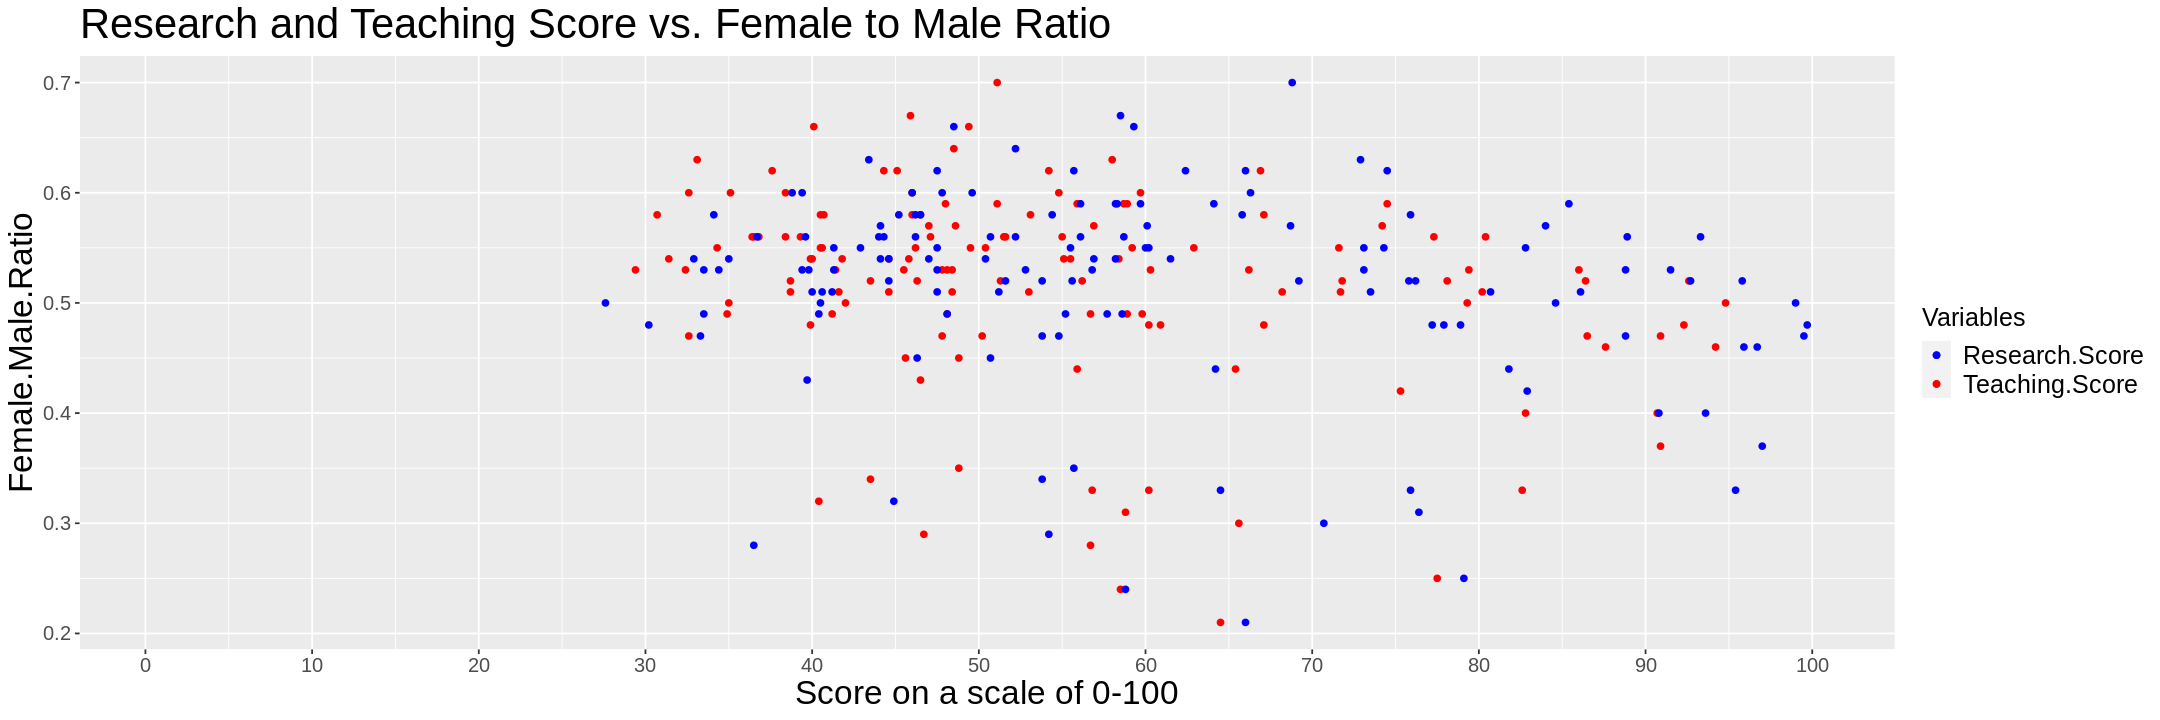

In [202]:
ggplot(tidy_data, aes(x = Teaching.Score, y = Female.Male.Ratio, color = "Teaching.Score")) +
  geom_point() +
  geom_point(aes(x = Research.Score, color = "Research.Score")) +
  scale_x_continuous(limits = c(1, 100), breaks = seq(0, 100, by = 10)) +
  labs(x = "Score on a scale of 0-100", y = "Female.Male.Ratio", color = "Variables", title = "Research and Teaching Score vs. Female to Male Ratio") +
  scale_color_manual(values = c("blue", "red")) +
  theme(axis.text = element_text(size = 12),  
        axis.title = element_text(size = 20),  
        plot.title = element_text(size = 25),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 15))  

options(repr.plot.width = 18, repr.plot.height = 6)

Lastly, we plot the research score vs. the teaching scores. These scores were seperately surveyed. There is a strong positive linear relationship between the two scores. This result is quite intuitive.

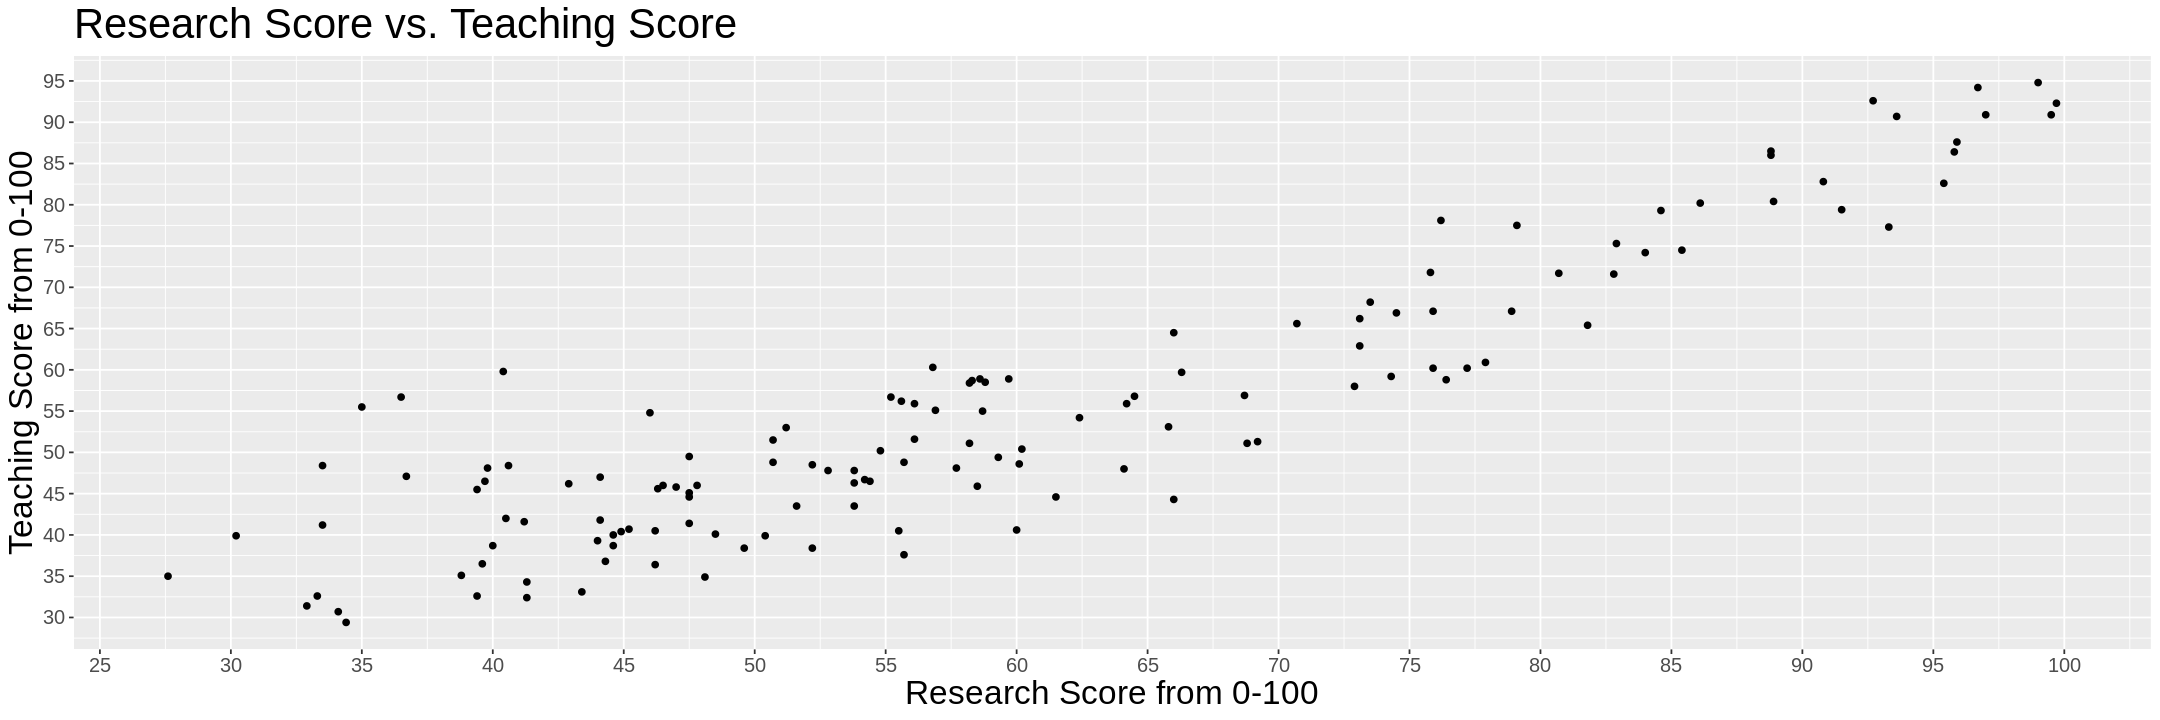

In [203]:
ggplot(tidy_data, aes(x=Research.Score, y=Teaching.Score)) +
       geom_point()+ scale_x_continuous(breaks = seq(0, 100, by = 5)) +
scale_y_continuous(breaks = seq(0, 100, by = 5)) +
labs(x = "Research Score from 0-100", y = "Teaching Score from 0-100", title = "Research Score vs. Teaching Score") +
       theme(axis.text = element_text(size = 12),  
             axis.title = element_text(size = 20),  
             plot.title = element_text(size = 25))  

options(repr.plot.width = 18, repr.plot.height = 6)